# Problème d'optimisation

Résolvons de prime abord le problème
$$
\min_{(x_1,x_2,x_3,x_3)\in K} 𝑥_1𝑥_4(𝑥_1+𝑥_2+𝑥_3)+𝑥_3
$$
où $K\subset \mathbb{R}^4$ est donné par
$$
K=\{(x_1,x_2,x_3,x_3)\in\mathbb{R}^4\mid 𝑥_1𝑥_2𝑥_3𝑥_4\geq 25, \ 𝑥^2_1+𝑥^2_2+𝑥^2_3+𝑥^2_4=40, \ 1\leq 𝑥_1,𝑥_2,𝑥_3,𝑥_4\leq 5\}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
m = GEKKO()

In [3]:
# Initialize Model
m = GEKKO()

#help(m)

#define parameter
eq = m.Param(value=40)

#initialize variables
x1,x2,x3,x4 = [m.Var() for i in range(4)]

#initial values
x1.value = 1
x2.value = 5
x3.value = 5
x4.value = 1

#lower bounds
x1.lower = 1
x2.lower = 1
x3.lower = 1
x4.lower = 1

#upper bounds
x1.upper = 5
x2.upper = 5
x3.upper = 5
x4.upper = 5

#Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==eq)

#Objective
m.Obj(x1*x4*(x1+x2+x3)+x3)

#Set global options
m.options.IMODE = 3 #steady state optimization

#Solve simulation
m.solve() # solve on public server

#Results
print('')
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))

apm 46.193.57.56_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

# Problème de contrôle optimal

On cherche à présent à résoudre le problème de contrôle optimal
$$
\inf_{u\in \mathcal{U}}J(u)
$$
où $\mathcal{U}$ et $J(u)$ sont définis par
$$
\mathcal{U} = \{u\in L^\infty(]0,2[)\mid -1\leq u(\cdot)\leq 1)\}, \quad J(u) = \frac{1}{2}\int_0^2 x_1(t)^2 dt
$$
et $x_1(\cdot)$ désigne la solution du système
$$
x_1'(t)=u(t), \quad x_1(0)=1.
$$
Afin de faire calculer l'intégrale par Gekko, sans s'embarrasser avec des formules de quadrature, on reformule le problème en
$$
\inf_{u\in \mathcal{U}}\hat J(u)
$$
où
$$
\mathcal{U} = \{u\in L^\infty(]0,2[)\mid -1\leq u(\cdot)\leq 1)\}, \quad \hat J(u) = x_2(2)
$$
et $(x_1,x_2)$ résout le système d'EDO :
$$
x_1'(t)=u(t), \quad x_2'(t)=\frac12 x_1(t)^2,\quad (x_1(0),x_2(0))=(1,0).
$$


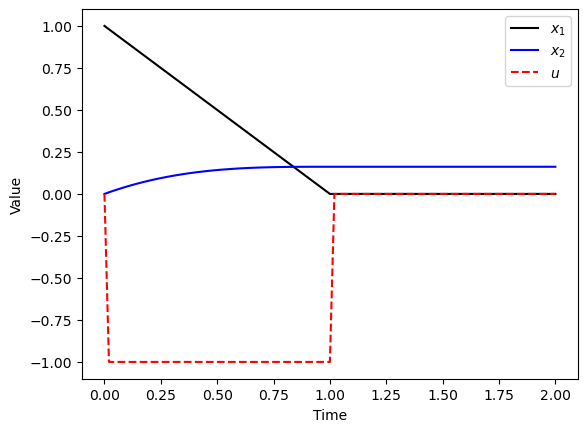

In [4]:
m = GEKKO(remote=False) # initialize gekko
nt = 101
m.time = np.linspace(0,2,nt)
# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=0,lb=-1,ub=1)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)
# Equations
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==0.5*x1**2)
m.Obj(x2*final) # Objective function
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False) # solve
plt.figure(1) # plot results
plt.plot(m.time,x1.value,'k-',label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',label=r'$x_2$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Problème de temps minimal

On donne ci-après un exemple de problème de temps minimal : 
$$
\min_{(T,u)\in \mathcal{U}}T
$$
où
$$
\mathcal{U}=\{(T,u)\in \mathbb{R}_+\times L^\infty(]0,T[)\mid -2\leq u(\cdot)\leq 2\text{ et }x_2(T)=x_3(T)=0\},
$$
avec $(x_1,x_2,x_3)$ solution du système
$$
x_1'(t)=u(t), \quad x_2'(t)=\cos(x_1(t)),\quad x_3'(t)=\sin(x_1(t)), \quad (x_1(0),x_2(0),x_3(0))=[\pi/2,4,0]
$$
qui se reformule de façcon équivalente en introduisant le changement de variable $t=T \tau$ avec $\tau \in [0,1]$, ainsi que les fonctions $\tilde x_1$, $\tilde x_2$, $\tilde x_3$ définies sur $[0,1]$ par
$$
\tilde x_i(\tau)=x_i(T\tau), \quad i=1,2,3.
$$
Le problème devient :
$$
\min_{(T,\tilde u)\in \mathcal{U}}T
$$
où
$$
\mathcal{U}=\{(T,\tilde u)\in \mathbb{R}_+\times L^\infty(]0,1[)\mid -2\leq u(\cdot)\leq 2\text{ et }\tilde x_2(1)=\tilde x_3(1)=0\},
$$
avec $(\tilde x_1,\tilde x_2,\tilde x_3)$ solution du système
$$
\tilde x_1'(\tau)=T\tilde u(\tau), \quad \tilde x_2'(\tau )=T\cos(\tilde x_1(\tau)),\quad \tilde x_3'(t)=T\sin(\tilde x_1(t)), \quad (\tilde x_1(0),\tilde x_2(0),\tilde x_3(0))=[\pi/2,4,0].
$$

Final Time: 4.2969916743


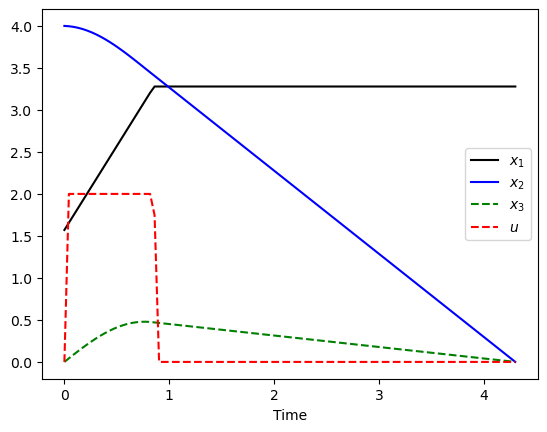

In [2]:
m = GEKKO() # initialize GEKKO
nt = 101
m.time = np.linspace(0,1,nt)
# Variables
x1 = m.Var(value=np.pi/2.0)
x2 = m.Var(value=4.0)
x3 = m.Var(value=0.0)
p = np.zeros(nt) # final time = 1
p[-1] = 1.0
final = m.Param(value=p)
# optimize final time
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1
# control changes every time period
u = m.MV(value=0,lb=-2,ub=2)
u.STATUS = 1
m.Equation(x1.dt()==u*tf)
m.Equation(x2.dt()==m.cos(x1)*tf)
m.Equation(x3.dt()==m.sin(x1)*tf)
m.Equation(x2*final<=0)
m.Equation(x3*final<=0)
m.Obj(tf)
m.options.IMODE = 6
m.solve(disp=False)
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x1.value,'k-',label=r'$x_1$')
plt.plot(tm,x2.value,'b-',label=r'$x_2$')
plt.plot(tm,x3.value,'g--',label=r'$x_3$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()